# TO DO 

- Classification
    - Bayesian network 
    - SVM 
    - hiearchical agglomerative methods (mirip decision tree?) 
- Sequence Pattern 
    - prefix span, menggunakan data belanja
- Probabilistic Model Clustering
    - k-means
    - gaussian mixture models (extension dari kmeans)
        - [in depth gmm](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

## KMeans

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 

In [3]:
#dataset generator

from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples = 400, 
                      centers = 4, 
                      cluster_std=0.8, 
                      random_state=0)
X = X[:, ::-1]
type(X)


numpy.ndarray

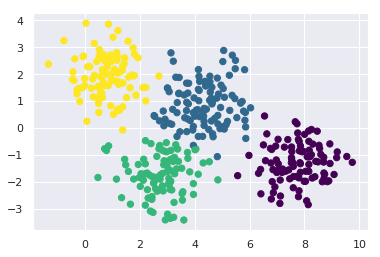

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:,0],X[:,1], c= labels, s=40, cmap='viridis')

In [13]:
#define kmeans visualization 
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_cluster=4, rseed=0, ax=None):
    labels=kmeans.fit_predict(X)
    
    #plot input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='viridis',zorder=2)
    
    #plot representation of kmeans model 
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i],[center]).max()
            for i, center in enumerate(centers)]
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        

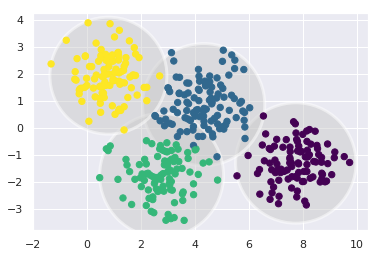

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans,X)
#kmeans always circular, or oblong.

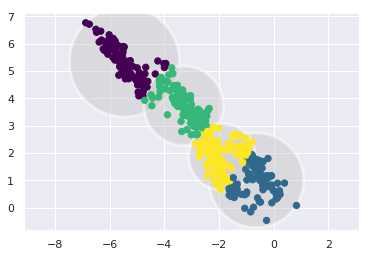

In [15]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X,rng.randn(2,2))
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_stretched)
#non circular set, transformed to circular 

# Gaussian Mixture Model 
## gmm merupakan *density estimator*
mirip dengan k-means, dengan menggunakan pendekatan expectation-maximization
1. ambil random untuk lokasi centroid dan bentuk 
2. repeat sampai konvergen 
    - *e-step*: tiap point, temukan "encoding weight" dengan kemungkinan titik di tiap cluster
    - *m-step*: tiap centroid, update lokasi, normalisasi dan bentuk dari seluruh data point, untuk membuat weight

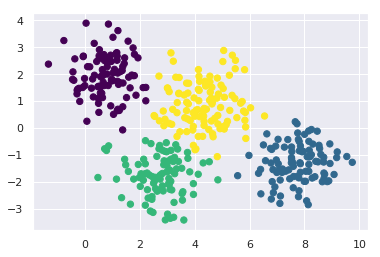

In [19]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

*gmm contains probablistic models* jadi bisa menunjukkan probabilistic cluster dengan menggunakan `predict_proba` yang return matrix `[n_samples, n_clusters]`

In [21]:
probs = gmm.predict_proba(X)
print(probs.round(3))

[[0.    0.004 0.    0.996]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 ...
 [1.    0.    0.    0.   ]
 [0.013 0.    0.04  0.947]
 [1.    0.    0.    0.   ]]


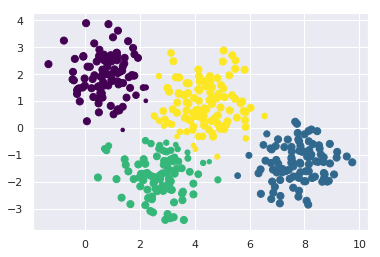

In [30]:
size = 50 * probs.max(1)**2 #dikuadratkan biar perbedaanya terlihat
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

In [42]:
#visualisasi 
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs): 
    ax = ax or plt.gca()
    
    #convert konvarians ke axis
    if covariance.shape == (2,2):
        U, s, Vt= np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width, height = 2*np.sqrt(s)
    else: 
        angle=0
        width,height=2*np.sqrt(covariance)
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

In [43]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels=gmm.fit(X).predict(X)
    if label: 
        ax.scatter(X[:, 0],X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else: 
        ax.scatater(X[:,0],X[:, 1], s=40, cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(position, covariance, alpha=w*w_factor)

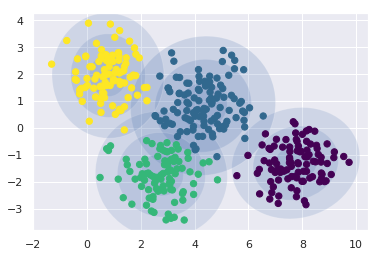

In [51]:
gmm = GaussianMixture(n_components = 4, covariance_type='full', random_state=0)
plot_gmm(gmm,X)

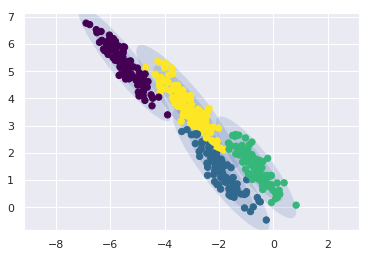

In [50]:
gmm2 = GaussianMixture(n_components = 4, random_state=0)
plot_gmm(gmm2,X_stretched)

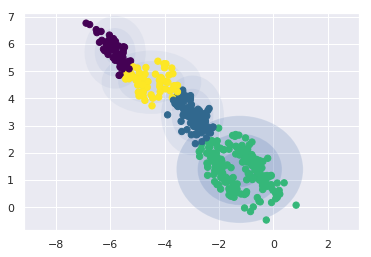

In [52]:
gmm = GaussianMixture(n_components = 4, covariance_type='diag', random_state=0)
plot_gmm(gmm,X_stretched)

## check optimal components
akaike information criterion, bayesian information criterion

In [57]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
         for n in n_components]

Text(0.5, 0, 'n_components')

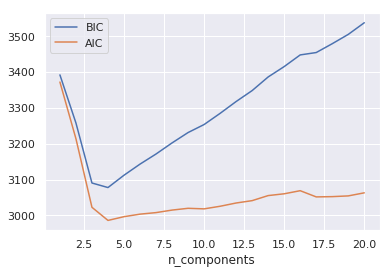

In [59]:
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

berarti
AIC = 3-5
BIC = 3-5